In [88]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from catmatch.recsys.content_based import (
    read_h5py_file,
)
from catmatch.recsys.content_based import (
    get_most_and_least_liked_items,
    recommend_k_new_items,
)
from catmatch.server.utils import (
    convert_ratings_dict_to_array,
    get_all_cat_breeds,
    get_image_url_from_index,
    get_index_from_image_url,get_random_cat_from_breed,
)
from rembg import remove
from catmatch.server.utils import load_image_paths
import random

In [76]:


SIMILARITY_MATRIX = read_h5py_file("./similarity_matrix_dinov2_flatten.hdf5")
IMAGE_PATHS = [path.replace(".data/", "/home/ulrikro/datasets/CatBreeds/") for path in load_image_paths()]

In [77]:
SIMILARITY_MATRIX

array([[1.    , 0.8096, 0.7305, ..., 0.8174, 0.8057, 0.7925],
       [0.8096, 1.    , 0.7935, ..., 0.874 , 0.8975, 0.836 ],
       [0.7305, 0.7935, 1.    , ..., 0.797 , 0.828 , 0.765 ],
       ...,
       [0.8174, 0.874 , 0.797 , ..., 1.    , 0.8584, 0.9033],
       [0.8057, 0.8975, 0.828 , ..., 0.8584, 1.    , 0.842 ],
       [0.7925, 0.836 , 0.765 , ..., 0.9033, 0.842 , 1.    ]],
      dtype=float16)

In [81]:
def get_two_random_images_and_sim(image1=None, image2=None):
    image1 = image1 or random.choice(IMAGE_PATHS)
    image2 = image2 or random.choice(IMAGE_PATHS)
    print(image1, image2)
    image1_index = IMAGE_PATHS.index(image1)
    image2_index = IMAGE_PATHS.index(image2)
    if image1_index is None or image2_index is None:
        print("Error in finding images.")
        return
    image1_check = get_image_url_from_index(image1_index)
    image2_check = get_image_url_from_index(image2_index)
    print(image1, "should be equal to", image1_check)
    print(image2, "should be equal to", image2_check)
    sim = SIMILARITY_MATRIX[image1_index, image2_index]
    print(f"Similarity: {sim}")
    
    fig, axs = plt.subplots(1, 2)  # Creates a figure and two subplots side by side
    im1 = Image.open(image1)
    im2 = Image.open(image2)
    
    axs[0].imshow(im1)  # Display the first image in the first subplot
    axs[0].axis('off')  # Disable axes for the first image
    axs[0].set_title(image1.split("/")[-1])
    
    axs[1].imshow(im2)  # Display the second image in the second subplot
    axs[1].axis('off')  # Disable axes for the second image
    axs[1].set_title(image2.split("/")[-1])
    
    plt.show()  # Display the figure with the images


In [83]:
ima = "/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_128.jpg"

In [89]:
im1 = Image.open(ima)
rem = remove(im1)
rem.show()

2024-03-11 21:42:13.734391878 [W:onnxruntime:Default, tensorrt_execution_provider.h:83 log] [2024-03-11 20:42:13 WARNING] onnx2trt_utils.cpp:374: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
2024-03-11 21:42:13.948780478 [W:onnxruntime:Default, tensorrt_execution_provider.h:83 log] [2024-03-11 20:42:13 WARNING] onnx2trt_utils.cpp:374: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.


In [108]:
index = IMAGE_PATHS.index(ima)
SIMILARITY_MATRIX[index, :].mean()

0.793

In [107]:
index

In [114]:

SIMILARITY_MATRIX.mean()

0.812

/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_128.jpg /home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue_195.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_128.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx_128.jpg
/home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue_195.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Russian Blue/Russian_Blue_195.jpg
Similarity: 0.890625


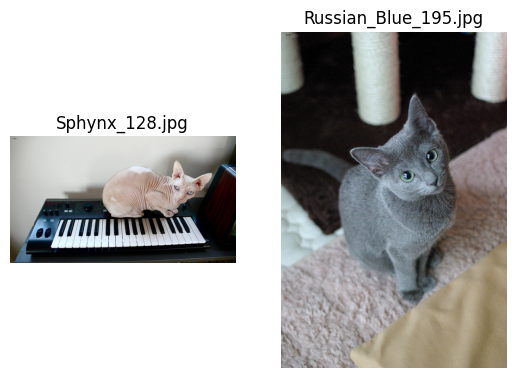

In [87]:
get_two_random_images_and_sim(ima)

/home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue-41338633_7328.jpg /home/ulrikro/datasets/CatBreeds/Bombay/Bombay-14474619_9051.jpg
/home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue-41338633_7328.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Russian Blue/Russian_Blue-41338633_7328.jpg
/home/ulrikro/datasets/CatBreeds/Bombay/Bombay-14474619_9051.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bombay/Bombay-14474619_9051.jpg
Similarity: 0.76318359375


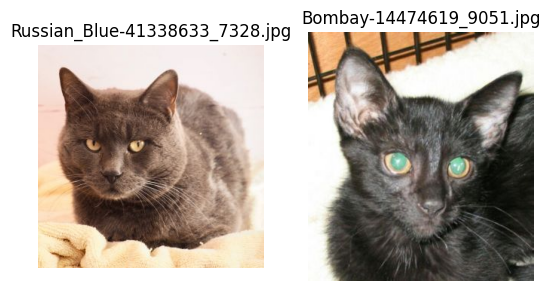

/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair-18911561_1978.jpg /home/ulrikro/datasets/CatBreeds/Birman/Birman_63.jpg
/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair-18911561_1978.jpg should be equal to https://storage.googleapis.com/catmatch/.data/British Shorthair/British_Shorthair-18911561_1978.jpg
/home/ulrikro/datasets/CatBreeds/Birman/Birman_63.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Birman/Birman_63.jpg
Similarity: 0.75830078125


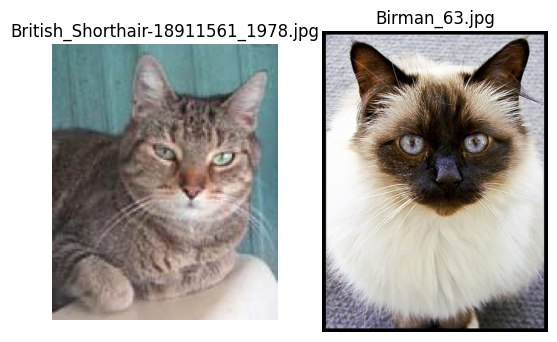

/home/ulrikro/datasets/CatBreeds/Birman/Birman-25368042_488.jpg /home/ulrikro/datasets/CatBreeds/Bombay/Bombay_69.jpg
/home/ulrikro/datasets/CatBreeds/Birman/Birman-25368042_488.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Birman/Birman-25368042_488.jpg
/home/ulrikro/datasets/CatBreeds/Bombay/Bombay_69.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bombay/Bombay_69.jpg
Similarity: 0.8408203125


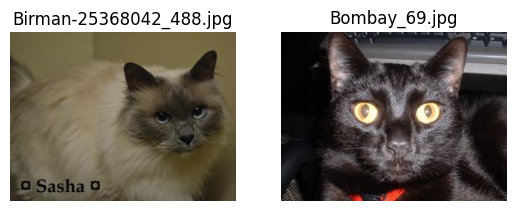

/home/ulrikro/datasets/CatBreeds/Bengal/Bengal-20822547_8622.jpg /home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx-42893093_46.jpg
/home/ulrikro/datasets/CatBreeds/Bengal/Bengal-20822547_8622.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bengal/Bengal-20822547_8622.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx-42893093_46.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx-42893093_46.jpg
Similarity: 0.80908203125


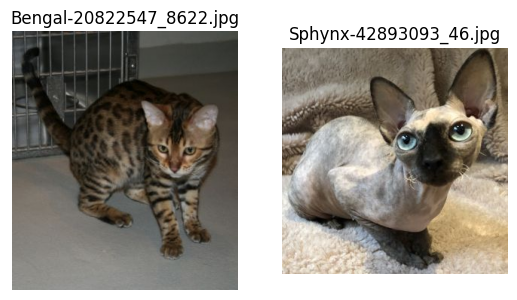

/home/ulrikro/datasets/CatBreeds/Bengal/Bengal_148.jpg /home/ulrikro/datasets/CatBreeds/Ragdoll/Ragdoll-21236566_7483.jpg
/home/ulrikro/datasets/CatBreeds/Bengal/Bengal_148.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bengal/Bengal_148.jpg
/home/ulrikro/datasets/CatBreeds/Ragdoll/Ragdoll-21236566_7483.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Ragdoll/Ragdoll-21236566_7483.jpg
Similarity: 0.8056640625


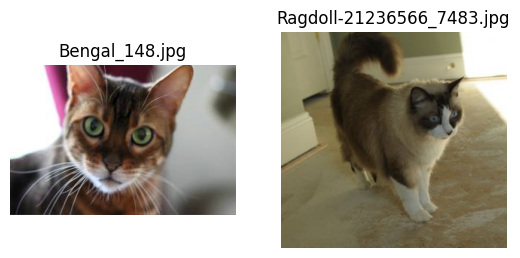

/home/ulrikro/datasets/CatBreeds/Bengal/Bengal_101.jpg /home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-46066046_27.jpg
/home/ulrikro/datasets/CatBreeds/Bengal/Bengal_101.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bengal/Bengal_101.jpg
/home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-46066046_27.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Abyssinian/Abyssinian-46066046_27.jpg
Similarity: 0.912109375


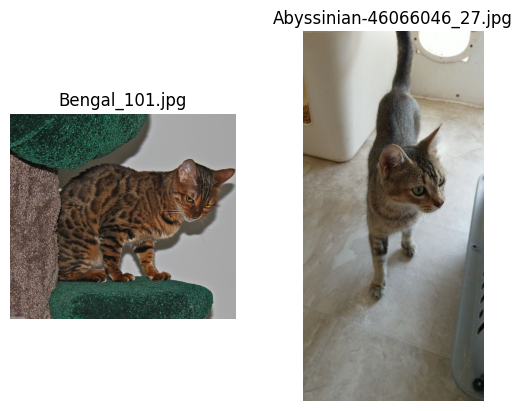

/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx-32674679_156.jpg /home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-31983641_2266.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx-32674679_156.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx-32674679_156.jpg
/home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-31983641_2266.jpg should be equal to https://storage.googleapis.com/catmatch/.data/American Bobtail/AmericanBobtail-31983641_2266.jpg
Similarity: 0.77392578125


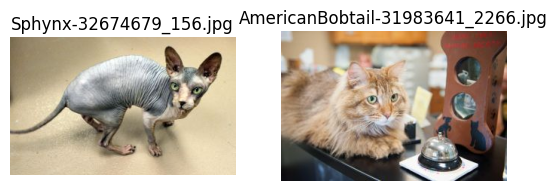

/home/ulrikro/datasets/CatBreeds/Birman/Birman-31613068_323.jpg /home/ulrikro/datasets/CatBreeds/Bengal/Bengal_15.jpg
/home/ulrikro/datasets/CatBreeds/Birman/Birman-31613068_323.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Birman/Birman-31613068_323.jpg
/home/ulrikro/datasets/CatBreeds/Bengal/Bengal_15.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bengal/Bengal_15.jpg
Similarity: 0.72314453125


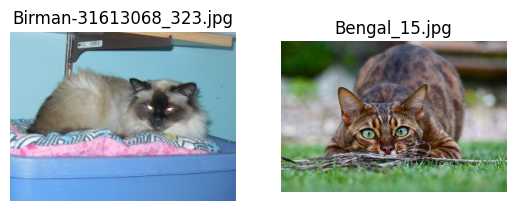

/home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-44186717_117.jpg /home/ulrikro/datasets/CatBreeds/Persian/Persian_80.jpg
/home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-44186717_117.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Abyssinian/Abyssinian-44186717_117.jpg
/home/ulrikro/datasets/CatBreeds/Persian/Persian_80.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Persian/Persian_80.jpg
Similarity: 0.82568359375


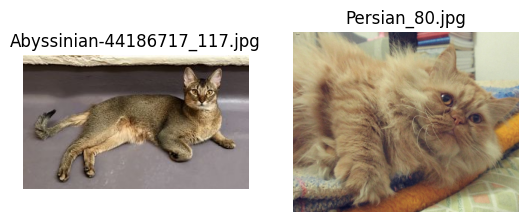

/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair-18873130_1982.jpg /home/ulrikro/datasets/CatBreeds/Bombay/Bombay-20590063_7920.jpg
/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair-18873130_1982.jpg should be equal to https://storage.googleapis.com/catmatch/.data/British Shorthair/British_Shorthair-18873130_1982.jpg
/home/ulrikro/datasets/CatBreeds/Bombay/Bombay-20590063_7920.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bombay/Bombay-20590063_7920.jpg
Similarity: 0.9052734375


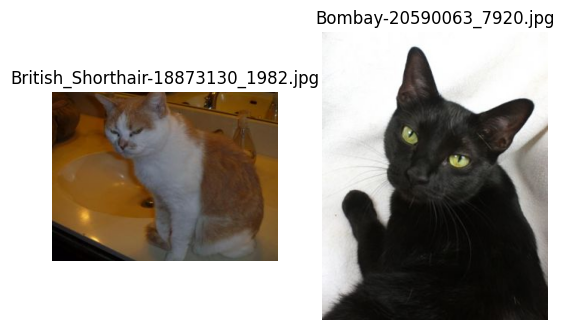

/home/ulrikro/datasets/CatBreeds/Bombay/Bombay-24091571_7123.jpg /home/ulrikro/datasets/CatBreeds/Siamese/Siamese-45292294_6422.jpg
/home/ulrikro/datasets/CatBreeds/Bombay/Bombay-24091571_7123.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bombay/Bombay-24091571_7123.jpg
/home/ulrikro/datasets/CatBreeds/Siamese/Siamese-45292294_6422.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Siamese/Siamese-45292294_6422.jpg
Similarity: 0.76806640625


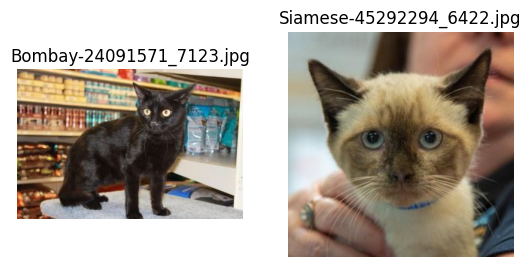

/home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-35465286_1665.jpg /home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon_139.jpg
/home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-35465286_1665.jpg should be equal to https://storage.googleapis.com/catmatch/.data/American Bobtail/AmericanBobtail-35465286_1665.jpg
/home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon_139.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Maine Coon/Maine_Coon_139.jpg
Similarity: 0.88916015625


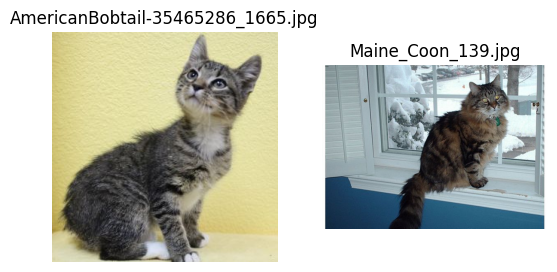

/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair_117.jpg /home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_91.jpg
/home/ulrikro/datasets/CatBreeds/British Shorthair/British_Shorthair_117.jpg should be equal to https://storage.googleapis.com/catmatch/.data/British Shorthair/British_Shorthair_117.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_91.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx_91.jpg
Similarity: 0.8896484375


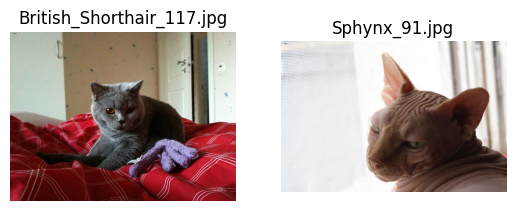

/home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue_133.jpg /home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-33686134_1942.jpg
/home/ulrikro/datasets/CatBreeds/Russian Blue/Russian_Blue_133.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Russian Blue/Russian_Blue_133.jpg
/home/ulrikro/datasets/CatBreeds/American Bobtail/AmericanBobtail-33686134_1942.jpg should be equal to https://storage.googleapis.com/catmatch/.data/American Bobtail/AmericanBobtail-33686134_1942.jpg
Similarity: 0.7734375


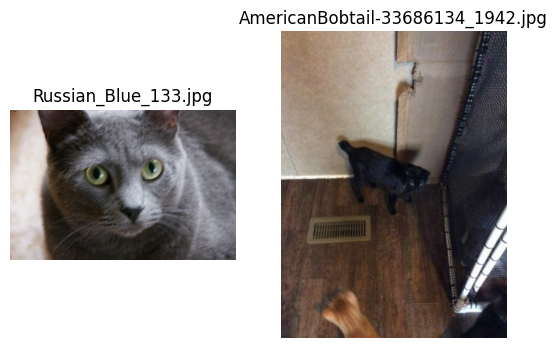

/home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-46141437_24.jpg /home/ulrikro/datasets/CatBreeds/Birman/Birman_29.jpg
/home/ulrikro/datasets/CatBreeds/Abyssinian/Abyssinian-46141437_24.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Abyssinian/Abyssinian-46141437_24.jpg
/home/ulrikro/datasets/CatBreeds/Birman/Birman_29.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Birman/Birman_29.jpg
Similarity: 0.8701171875


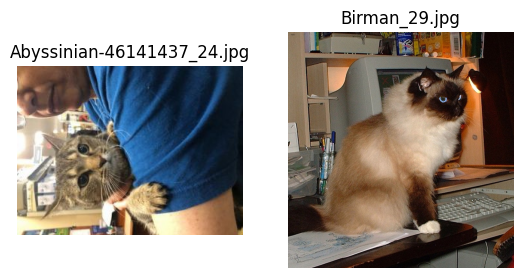

/home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon-43408622_6478.jpg /home/ulrikro/datasets/CatBreeds/Tuxedo/Tuxedo-43288750_8292.jpg
/home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon-43408622_6478.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Maine Coon/Maine_Coon-43408622_6478.jpg
/home/ulrikro/datasets/CatBreeds/Tuxedo/Tuxedo-43288750_8292.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Tuxedo/Tuxedo-43288750_8292.jpg
Similarity: 0.84375


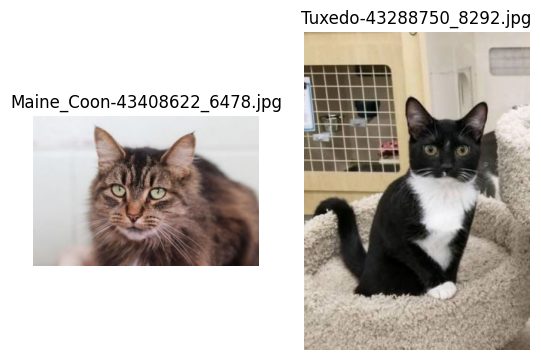

/home/ulrikro/datasets/CatBreeds/Egyptian Mau/Egyptian_Mau-32603400_528.jpg /home/ulrikro/datasets/CatBreeds/Persian/Persian_164.jpg
/home/ulrikro/datasets/CatBreeds/Egyptian Mau/Egyptian_Mau-32603400_528.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Egyptian Mau/Egyptian_Mau-32603400_528.jpg
/home/ulrikro/datasets/CatBreeds/Persian/Persian_164.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Persian/Persian_164.jpg
Similarity: 0.78076171875


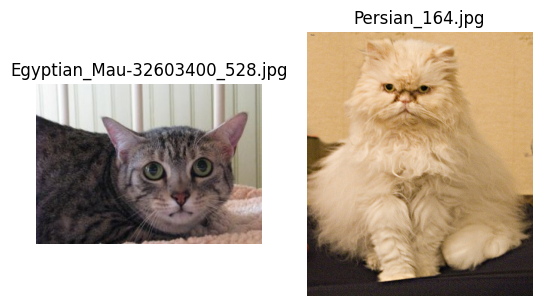

/home/ulrikro/datasets/CatBreeds/Tuxedo/Tuxedo-44076618_6727.jpg /home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_80.jpg
/home/ulrikro/datasets/CatBreeds/Tuxedo/Tuxedo-44076618_6727.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Tuxedo/Tuxedo-44076618_6727.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_80.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx_80.jpg
Similarity: 0.73828125


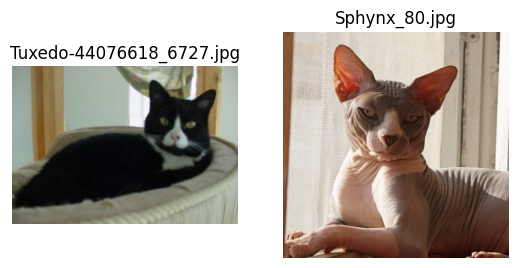

/home/ulrikro/datasets/CatBreeds/Bombay/Bombay_65.jpg /home/ulrikro/datasets/CatBreeds/Egyptian Mau/Egyptian_Mau_43.jpg
/home/ulrikro/datasets/CatBreeds/Bombay/Bombay_65.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Bombay/Bombay_65.jpg
/home/ulrikro/datasets/CatBreeds/Egyptian Mau/Egyptian_Mau_43.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Egyptian Mau/Egyptian_Mau_43.jpg
Similarity: 0.8935546875


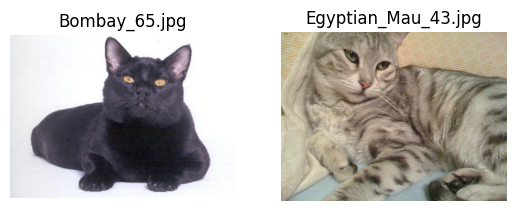

/home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon_131.jpg /home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_199.jpg
/home/ulrikro/datasets/CatBreeds/Maine Coon/Maine_Coon_131.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Maine Coon/Maine_Coon_131.jpg
/home/ulrikro/datasets/CatBreeds/Sphynx/Sphynx_199.jpg should be equal to https://storage.googleapis.com/catmatch/.data/Sphynx/Sphynx_199.jpg
Similarity: 0.8046875


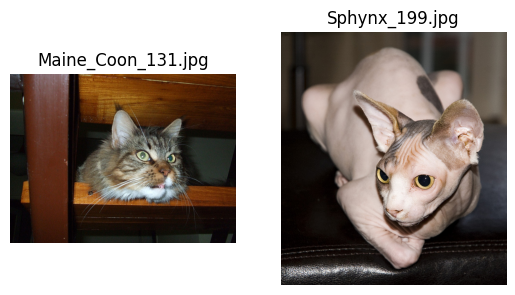

In [79]:
for i in range(20):
    get_two_random_images_and_sim()